,disease:,no disease:,total:
exposed:,24,61,85
nonexposed:,214,869,1083
total:,238,930,1168




True Odds Ratio: 1.5976712118890761



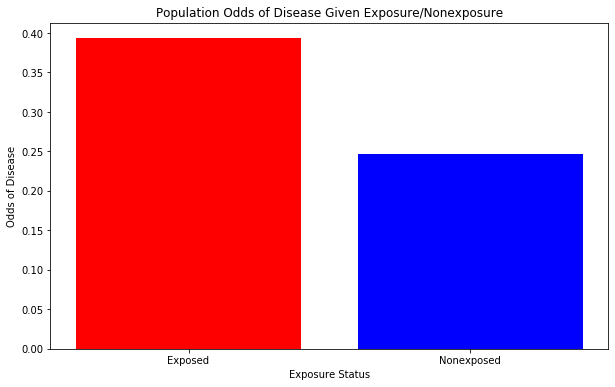

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample_size,odds_ratio,log_odds_ratio,var_log_odds_ratio,ub_ci_log_odds_ratio,lb_ci_log_odds_ratio,weight
study number:,,,,,,,,,,,
0,17,33,130,531,711,2.104196,0.743933,0.098702,1.359704,0.128162,10.131496
1,18,35,125,510,688,2.098286,0.741121,0.094088,1.342326,0.139916,10.628374
2,11,22,96,371,500,1.932292,0.658707,0.149476,1.416484,-0.099070,6.690050
3,16,28,118,459,621,2.222760,0.798750,0.108868,1.445453,0.152046,9.185477
4,18,45,129,520,712,1.612403,0.477726,0.087453,1.057345,-0.101894,11.434741
5,15,31,108,481,635,2.155018,0.767799,0.110263,1.418634,0.116964,9.069226
6,6,18,72,282,378,1.305556,0.266629,0.239657,1.226143,-0.692885,4.172626
7,11,18,77,326,432,2.587302,0.950615,0.162519,1.740763,0.160468,6.153121
8,16,39,132,532,719,1.653458,0.502869,0.097596,1.115181,-0.109444,10.246271


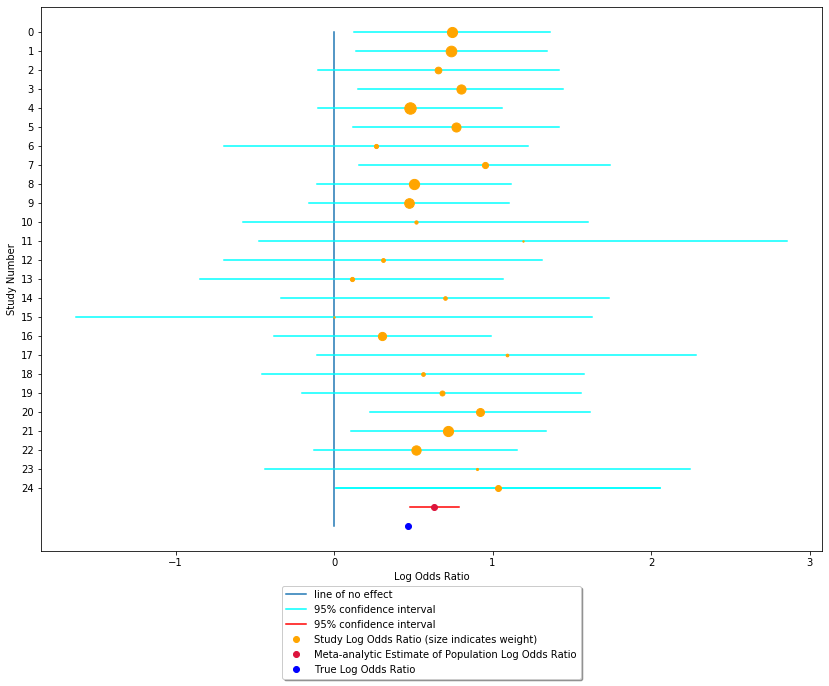

Z statistic of summary effect estimate =  7.9459295620663815
p =  1.9984014443252818e-15


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

pd.set_option('mode.chained_assignment', None)

# generating the population 

population = np.array([])

population_size = np.random.randint(1000,8000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2, high = 0.4)

disease_general = np.random.uniform(high = exposure_danger)


for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))

        

# creating the counts

population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no disease:', 'total:'])

if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,0] == 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[0,0] == 0.5
    

df_pop.iloc[0,0] = exposed_disease
df_pop.iloc[0,1] = exposed_no_disease
df_pop.iloc[0,2]  = exposed_disease + exposed_no_disease
df_pop.iloc[1,0] = nonexposed_disease
df_pop.iloc[1,1] = nonexposed_no_disease
df_pop.iloc[1,2] = nonexposed_disease + nonexposed_no_disease
df_pop.iloc[2,0] = exposed_disease + nonexposed_disease
df_pop.iloc[2,1] = exposed_no_disease + nonexposed_no_disease 
df_pop.iloc[2,2] = population_n

display(df_pop)
print()


# calculating the population effect sizes

odds_disease_giv_exposure = exposed_disease/exposed_no_disease

odds_disease_giv_nonexposure = nonexposed_disease/nonexposed_no_disease

true_odds_ratio = odds_disease_giv_exposure/odds_disease_giv_nonexposure

true_log_odds_ratio = np.log(true_odds_ratio)

    
print()
print('True Odds Ratio:', true_odds_ratio)
print()


plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [odds_disease_giv_exposure, odds_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Odds of Disease')
plt.title('Population Odds of Disease Given Exposure/Nonexposure')
plt.show()



# simulating the studies

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])


counter=1

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
    counter = counter + 1
 
    
counter = 0
df['sample_size'] = 0
for i in np.arange(len(df)):
    df['sample_size'][counter]= df['exposed_disease'][counter]+df['exposed_no_disease'][counter]+df['nonexposed_disease'][counter]+df['nonexposed_no_disease'][counter]
    counter = counter+1
    
df.index.name = 'study number:'



# calculating the odds ratio for each study

counter= 0
df['odds_ratio'] = 0.0


for i in np.arange(len(df)):
    df['odds_ratio'][counter] = (df['exposed_disease'][counter]/df['exposed_no_disease'][counter])/(df['nonexposed_disease'][counter]/df['nonexposed_no_disease'][counter])
    counter = counter+1
    
# calculating the log odds ratio for each study

counter= 0
df['log_odds_ratio'] = 0.0


for i in np.arange(len(df)):
    df['log_odds_ratio'][counter] = np.log(df['odds_ratio'][counter])
    counter = counter+1

    
# calculating standard error for the odds ratio

SE_log_odds_ratio = np.array([])
var_log_odds_ratio = np.array([])


counter = 0
for i in np.arange(len(df)):
    temp_var_log_odds_ratio = 1/df['exposed_disease'][counter] + 1/df['exposed_no_disease'][counter] + 1/df['nonexposed_disease'][counter] + 1/df['nonexposed_no_disease'][counter]                            
    temp_se_log_odds_ratio = np.sqrt(temp_var_log_odds_ratio)
    SE_log_odds_ratio = np.append(SE_log_odds_ratio, temp_se_log_odds_ratio)
    var_log_odds_ratio = np.append(var_log_odds_ratio,temp_var_log_odds_ratio)
    counter = counter+1

df['var_log_odds_ratio'] = 0.0
df['ub_ci_log_odds_ratio'] = 0.0
df['lb_ci_log_odds_ratio'] = 0.0
df['weight'] = 0.0


counter = 0 
for i in np.arange(len(df)):
    
    df['var_log_odds_ratio'][counter] = var_log_odds_ratio[counter]
    df['ub_ci_log_odds_ratio'][counter] = df['log_odds_ratio'][counter] + 1.96 * SE_log_odds_ratio[counter]
    df['lb_ci_log_odds_ratio'][counter] = df['log_odds_ratio'][counter] - 1.96 * SE_log_odds_ratio[counter]
    df['weight'][counter] = 1/var_log_odds_ratio[counter]
 
    counter = counter + 1
    
display(df)


# creating a forest plot of odds ratios


y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)
    

study_list = list(df.index)



plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Odds Ratio')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()


counter = 0
for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_odds_ratio'][counter],df['ub_ci_log_odds_ratio'][counter])
    ys = []
    for i in xs:
        ys.append(study_list[counter])
    plt.plot(xs, ys, color = 'cyan')
 
    counter = counter + 1
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
    

counter = 0
for i in np.arange(len(df)):
    plt.plot(df['log_odds_ratio'][counter], counter, 'o', color = 'orange', markersize = df['weight'][counter])
    counter = counter + 1
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_odds_ratio']
weights = df['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = []

counter = 0
for i in np.arange(len(effect_sizes)):
    effect_size_times_weight.append(effect_sizes[counter]*weights[counter])
    counter = counter+1

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_odds_ratio'][len(df['log_odds_ratio'])-1], len(df['log_odds_ratio'])-1, 'o', color = 'orange', label = 'Study Log Odds Ratio (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Odds Ratio')

plt.plot(true_log_odds_ratio,max(df.index)+2, 'o', color = 'blue', label = 'True Log Odds Ratio')


import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()


# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))


print('Z statistic of summary effect estimate = ', z)
print('p = ', p)